### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### import dataset

In [3]:
data = pd.read_csv('student_scores.csv')
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### visualize data

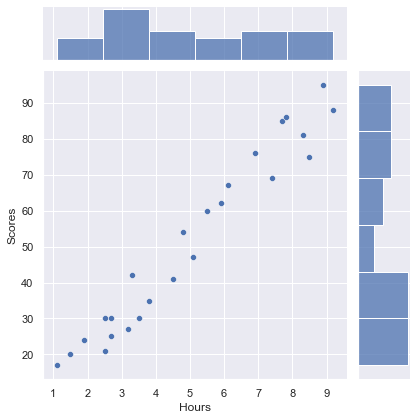

In [8]:
sns.jointplot(x = 'Hours',y='Scores',data=data)

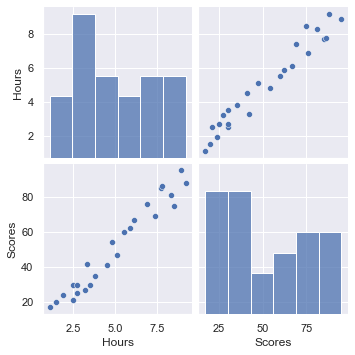

In [9]:
sns.pairplot(data)

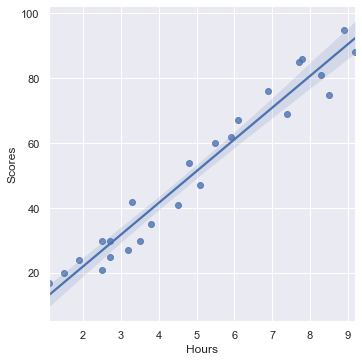

In [10]:
sns.lmplot(x='Hours',y='Scores',data=data)

### spliting dataset

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [12]:
x_train.shape

(20, 1)

In [14]:
y_train.shape

(20,)

### training the model

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Predicting the test set

In [19]:
y_pred = reg.predict(x_test)
np.set_printoptions(precision = 2)

In [20]:
print(y_pred,'\n\n',y_test)

[16.88 33.73 75.36 26.79 60.49] 

 5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


Text(0, 0.5, 'Scores')

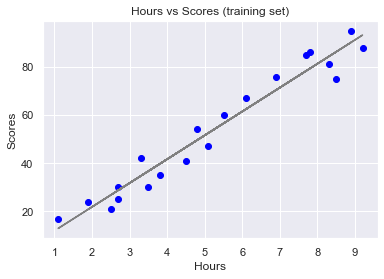

In [21]:
plt.scatter(x_train,y_train,color = 'blue')
plt.plot(x_train,reg.predict(x_train),color = 'grey')
plt.title('Hours vs Scores (training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

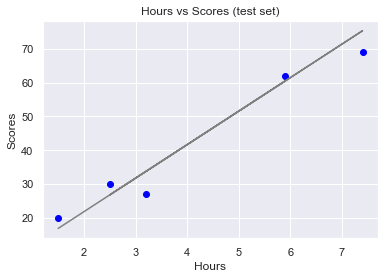

In [22]:
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x_test,reg.predict(x_test),color = 'grey')
plt.title('Hours vs Scores (test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')

### model coefficient and intercept

In [23]:
print('model coefficient : ',reg.coef_)
print('model intercept : ',reg.intercept_)

model coefficient :  [9.91]
model intercept :  2.018160041434683


### predicting single value

In [24]:
Score  = reg.predict([[10]])
print(Score)

[101.12]
